### DEMO ALGORITHMS FOR RANDOM DATASET(WEATHER FORECAST)

Dữ liệu được tải thành công!

Thông tin dữ liệu trước xử lý:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3904 entries, 0 to 3903
Data columns (total 47 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                3904 non-null   object 
 1   sp500 open          3719 non-null   float64
 2   sp500 high          3719 non-null   float64
 3   sp500 low           3719 non-null   float64
 4   sp500 close         3719 non-null   float64
 5   sp500 volume        3719 non-null   float64
 6   sp500 high-low      3719 non-null   float64
 7   nasdaq open         3719 non-null   float64
 8   nasdaq high         3719 non-null   float64
 9   nasdaq low          3719 non-null   float64
 10  nasdaq close        3719 non-null   float64
 11  nasdaq volume       3719 non-null   float64
 12  nasdaq high-low     3719 non-null   float64
 13  us_rates_%          176 non-null    float64
 14  CPI                 176 non-null    float64

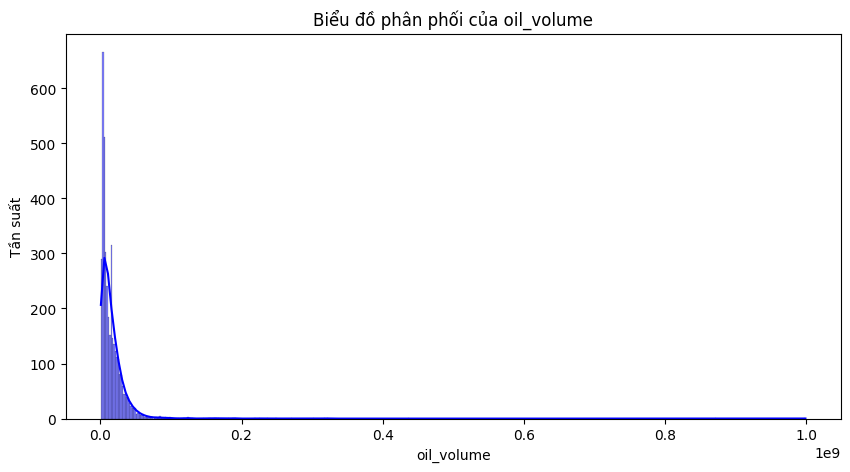


Phân tích tương quan giữa 'oil_volume' và 'palladium_high':
Hệ số tương quan: -0.0060


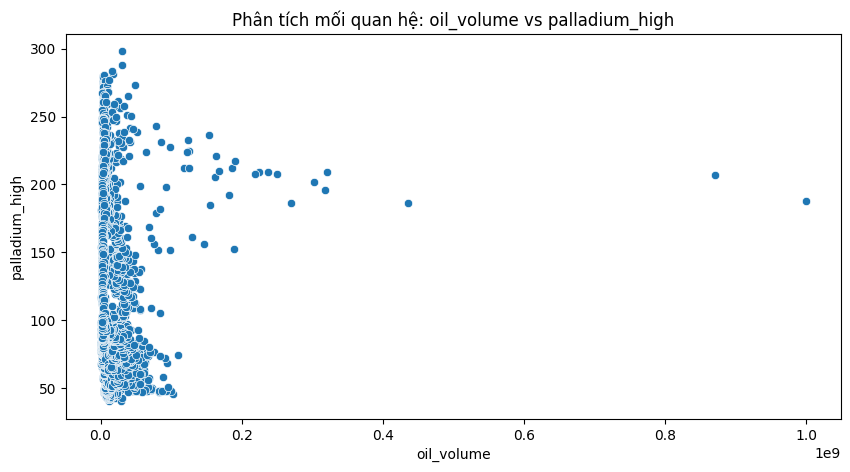

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import ttest_ind
import random

# 1. Đọc dữ liệu từ file CSV
file_path = 'financial_regression.csv'  # Đường dẫn tới tệp
try:
    df = pd.read_csv(file_path)
    print("Dữ liệu được tải thành công!")
except FileNotFoundError:
    print(f"Tệp '{file_path}' không tồn tại. Vui lòng kiểm tra đường dẫn.")
    raise

# 2. Kiểm tra thông tin dữ liệu
print("\nThông tin dữ liệu trước xử lý:")
print(df.info())

# Chuẩn hóa tên cột
df.columns = df.columns.str.strip().str.replace(' ', '_')
print("\nTên cột sau khi chuẩn hóa:", df.columns)

# 3. Tiền xử lý dữ liệu
# Xác định cột số và cột chuỗi
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Điền giá trị thiếu
imputer_num = SimpleImputer(strategy='mean')  # Với cột số
imputer_cat = SimpleImputer(strategy='most_frequent')  # Với cột chuỗi
df[numeric_columns] = imputer_num.fit_transform(df[numeric_columns])
df[categorical_columns] = imputer_cat.fit_transform(df[categorical_columns])

# Loại bỏ các bản ghi trùng lặp
df = df.drop_duplicates()

print("\nThông tin dữ liệu sau xử lý:")
print(df.info())

# 4. Chọn ngẫu nhiên 1 cột để phân tích
if len(numeric_columns) > 1:
    selected_column = random.choice(numeric_columns)
    print(f"\nCột được chọn ngẫu nhiên để phân tích chính: {selected_column}")

    # Chọn một cột khác để so sánh
    other_columns = [col for col in numeric_columns if col != selected_column]
    secondary_column = random.choice(other_columns)
    print(f"\nCột được chọn ngẫu nhiên để so sánh: {secondary_column}")

    # 5. Phân tích thống kê cơ bản
    stats_summary = df[selected_column].describe()
    print(f"\nMô tả thống kê cơ bản của cột '{selected_column}':\n", stats_summary)

    # 6. Vẽ biểu đồ phân phối
    plt.figure(figsize=(10, 5))
    sns.histplot(df[selected_column], kde=True, color='blue')
    plt.title(f"Biểu đồ phân phối của {selected_column}")
    plt.xlabel(selected_column)
    plt.ylabel("Tần suất")
    plt.show()

    # 7. Phân tích mối quan hệ với cột được chọn thứ hai
    print(f"\nPhân tích tương quan giữa '{selected_column}' và '{secondary_column}':")
    correlation = df[[selected_column, secondary_column]].corr().iloc[0, 1]
    print(f"Hệ số tương quan: {correlation:.4f}")

    # Vẽ biểu đồ scatter
    plt.figure(figsize=(10, 5))
    sns.scatterplot(x=df[selected_column], y=df[secondary_column])
    plt.title(f"Phân tích mối quan hệ: {selected_column} vs {secondary_column}")
    plt.xlabel(selected_column)
    plt.ylabel(secondary_column)
    plt.show()
else:
    print("Dữ liệu không đủ cột số để thực hiện phân tích.")


## Kết luận
-Yếu tố như Temperature, Humidity, Cloud_Cover có thể ảnh hưởng tới việc rain/ no_rain và có thể dùng để dự đoán khả năng mưa.